# Time Series Analysis ARIMA Models

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults

import warnings
warnings.filterwarnings("ignore")

In [2]:
#help(auto_arima)

### Births Data

In [4]:
births = pd.read_csv("C:/Users/Imy Hull/datasets/DailyTotalFemaleBirths.csv", index_col = 0,parse_dates = True)
births.index.freq = 'D'

In [5]:
stepwise_fit = auto_arima(births["Births"], start_p = 0, start_q = 0, max_p = 10, max_q = 5, seasonal = False, trace = True);

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2462.992, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [6]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Wed, 17 Nov 2021   AIC                           2459.074
Time:                        10:54:02   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Flights Data

In [8]:
air = pd.read_csv("C:/Users/Imy Hull/datasets/airline_passengers.csv", index_col = "Month", parse_dates = True)
air.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
# m is the seasonal frequency
stepwise_fit = auto_arima(air["Thousands of Passengers"], start_p = 1, start_q = 1, max_p = 4, max_q = 4, 
                          seasonal = True, trace = True, m = 12);

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1022.299, Time=0.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.68 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.21 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.13 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.22 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.30 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.16 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.08 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [10]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 17 Nov 2021   AIC                           1019.178
Time:                                     10:54:32   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARMA and ARIMA Models (using ACF and PACF plots)

## Simple ARMA Model

In [14]:
# Construct a formula to print it out neatly

def adf_test (df):
    dftest = adfuller(df)
    df_out = pd.Series(dftest[0:4], index = ["ADF Test Statistic", "P-Value", "Number of Lags","Number of Observations"])
    for key,value in dftest[4].items():
        df_out[f'critical value({key})'] = value
        
    if df_out[1]<0.05:
        print("Reject the Null Hypothesis, the data has no unit root and is stationary")
    else:
        print("Fail to reject the Null Hypothesis, the data has a unit root and is non-stationary")
    return df_out

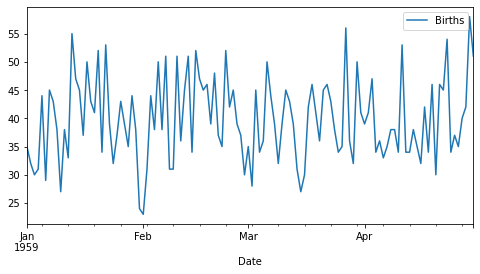

In [15]:
# Take first 120 days of data from the births dataset where the data is pretty much stationary anyway
birthsb = births[:120]
birthsb.plot(figsize = (8,4));

In [18]:
# Confirm stationarity
adf_test(birthsb)

Reject the Null Hypothesis, the data has no unit root and is stationary


ADF Test Statistic       -9.855384e+00
P-Value                   4.373545e-17
Number of Lags            0.000000e+00
Number of Observations    1.190000e+02
critical value(1%)       -3.486535e+00
critical value(5%)       -2.886151e+00
critical value(10%)      -2.579896e+00
dtype: float64

In [19]:
# Set training and test sets for 90 days and fit model
train = birthsb.iloc[:90]
test = birthsb.iloc[90:]

In [20]:
# Set data to float or the model will not predict. Differencing set to 0 as the data is stationary anyway
model = ARIMA(train["Births"].astype('float32'), order=(0, 0, 0))
results = model.fit()

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                          ARIMA   Log Likelihood                -308.379
Date:                Wed, 17 Nov 2021   AIC                            620.759
Time:                        10:58:56   BIC                            625.759
Sample:                    01-01-1959   HQIC                           622.775
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7667      0.786     50.609      0.000      38.227      41.307
sigma2        55.4236     10.155      5.458      0.000      35.520      75.327
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.41   Prob(JB):                         0.42
Heteroskedasticity (H):               0.90   Skew:                             0.06
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# Predict a months worth of values
start = len(train)
end = len(train) + len(test) -1

In [23]:
predictions = results.predict(start, end).rename("ARMA00")
predictions.head()

1959-04-01    39.766662
1959-04-02    39.766662
1959-04-03    39.766662
1959-04-04    39.766662
1959-04-05    39.766662
Freq: D, Name: ARMA00, dtype: float64

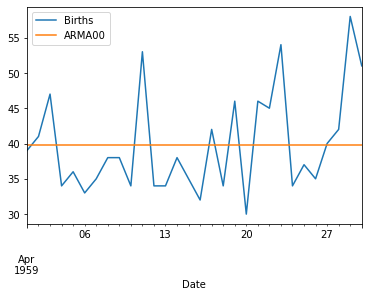

In [24]:
# Plot the test values and the predicted values of the ARMA model
test["Births"].plot(legend = True)
predictions.plot(legend = True);

In [25]:
# Get the mean
test.mean()

Births    39.833333
dtype: float64

The mean of the data shows the model predicts close to the mean average

## ARIMA Model Using Autoarima

### Trade Data

In [26]:
# Bring in new dataset
trade = pd.read_csv("datasets/TradeInventories.csv",index_col = 0, parse_dates = True)
trade.index.freq = "MS"

In [27]:
trade.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


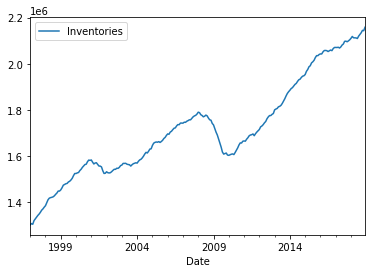

In [28]:
trade.plot();

In [29]:
adf_test(trade["Inventories"])

Fail to reject the Null Hypothesis, the data has a unit root and is non-stationary


ADF Test Statistic         -0.087684
P-Value                     0.950652
Number of Lags              5.000000
Number of Observations    258.000000
critical value(1%)         -3.455953
critical value(5%)         -2.872809
critical value(10%)        -2.572775
dtype: float64

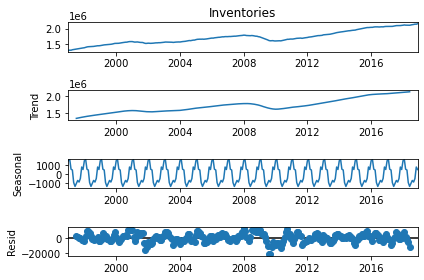

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(trade["Inventories"], model = "additive")
result.plot();

There is some seasonality but this will be ignored for this example. It is also very small compared to trend

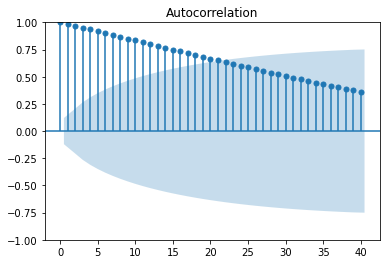

In [31]:
# Plot ACF on orignal undifferenced data
plot_acf(trade["Inventories"],lags = 40);

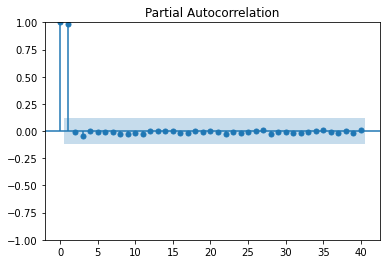

In [32]:
# Plot PACF on undifferenced data
plot_pacf(trade["Inventories"],lags = 40);

In [33]:
# Difference the data
from statsmodels.tsa.statespace.tools import diff
trade["DIFF1"] = diff(trade["Inventories"],k_diff = 1)

In [34]:
# Run the test on the differenced column excluding the NAN - to show that the data is stationary with one order of differencing
## Agrees with the autoarima function. Differencing of 1 is required.
adf_test(trade["DIFF1"].iloc[1:])

Reject the Null Hypothesis, the data has no unit root and is stationary


ADF Test Statistic         -3.412249
P-Value                     0.010548
Number of Lags              4.000000
Number of Observations    258.000000
critical value(1%)         -3.455953
critical value(5%)         -2.872809
critical value(10%)        -2.572775
dtype: float64

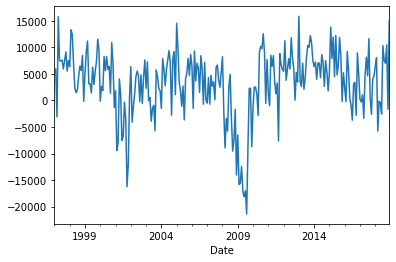

In [35]:
# Plot the differenced data
trade["DIFF1"].plot();

In [36]:
# Run autoarima on the original undifferenced data confirms one order of differencing required
auto_arima(trade["Inventories"], seasonal = False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Wed, 17 Nov 2021   AIC                           5348.037
Time:                        10:59:08   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Analysing the plots- rule if the PACF of the differenced series shows a sharp cutoff, then consider adding an AR term, the lag where it cuts off is the number of terms.

If the PACF has a sharp cutoff while the ACF decays more slowly with significant lags, then the stationarised series displays an AR pattern, add AR terms rather than MA terms. Set MA to zero or 1.

In this case, with one order of differencing the data becomes stationary and requires no AR or MA orders

In [37]:
# Split into train and test sets
len(trade)

264

In [38]:
train = trade.iloc[:252]
test = trade.iloc[252:]

In [39]:
# Try a (0,0,0) model as the ACF and PACF suggest
model = ARIMA(train["Inventories"].astype('float32'), order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2579.217
Date:                Wed, 17 Nov 2021   AIC                           5160.434
Time:                        10:59:10   BIC                           5163.959
Sample:                    01-01-1997   HQIC                          5161.852
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.911e+07   4.75e+06     10.330      0.000    3.98e+07    5.84e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):               105.61
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -1.20
Prob(H) (two-sided):                  0.62   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
start = len(train)
end = len(train) + len(test)-1
predictions = results.predict(start = start, end = end, typ = 'levels').rename("ARIMA (0,1,0)")
predictions

2018-01-01    2103751.0
2018-02-01    2103751.0
2018-03-01    2103751.0
2018-04-01    2103751.0
2018-05-01    2103751.0
2018-06-01    2103751.0
2018-07-01    2103751.0
2018-08-01    2103751.0
2018-09-01    2103751.0
2018-10-01    2103751.0
2018-11-01    2103751.0
2018-12-01    2103751.0
Freq: MS, Name: ARIMA (0,1,0), dtype: float64

### NOTE - set type to 'levels' to return the predictions as per the original series rather than as a differenced series

<AxesSubplot:xlabel='Date'>

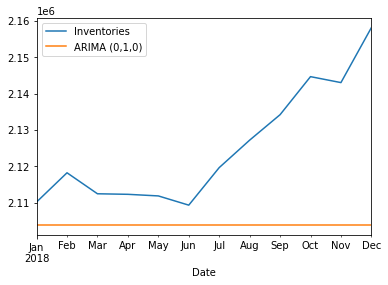

In [41]:
test["Inventories"].plot(legend = True)
predictions.plot(legend = True)

Actually this doesn't pick up the trend in the data at all. Try a different model

<AxesSubplot:xlabel='Date'>

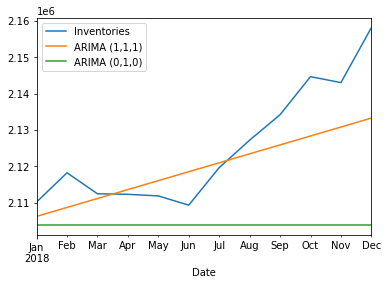

In [42]:
model = ARIMA(train["Inventories"].astype('float32'), order=(1,1,1))
results2 = model.fit()
predictions2 = results2.predict(start = start, end = end, typ = 'levels').rename("ARIMA (1,1,1)")
test["Inventories"].plot(legend = True)
predictions2.plot(legend = True)
predictions.plot(legend = True)

In [43]:
from statsmodels.tools.eval_measures import rmse
error = rmse(test["Inventories"],predictions2)
error

10531.060968700249

In [44]:
test["Inventories"].mean()

2125075.6666666665

In [45]:
predictions2.mean()

2119726.156790261

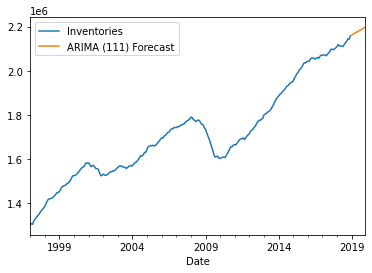

In [46]:
# Forecast into the future - retrain model on all data not just training
model = ARIMA(trade["Inventories"], order = (1,1,1))
results = model.fit()
forecast = results.predict(start = len(trade), end = len(trade)+11, typ = 'levels').rename("ARIMA (111) Forecast")
trade["Inventories"].plot(legend = True)
forecast.plot(legend = True);

# Seasonal ARIMA Models

In [48]:
co2 = pd.read_csv("datasets/co2_mm_mlo.csv")

In [49]:
co2.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [50]:
co2["date"] = pd.to_datetime({"Year":co2["year"],"Month":co2["month"],"Day":1})

In [52]:
co2.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [53]:
co2.tail()

,year,month,decimal_date,average,interpolated,date
724,2018,7,2018.542,408.71,408.71,2018-07-01
725,2018,8,2018.625,406.99,406.99,2018-08-01
726,2018,9,2018.708,405.51,405.51,2018-09-01
727,2018,10,2018.792,406.00,406.00,2018-10-01
728,2018,11,2018.875,408.02,408.02,2018-11-01


In [54]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [55]:
co2.set_index("date",inplace = True)
co2.index.freq = "MS"

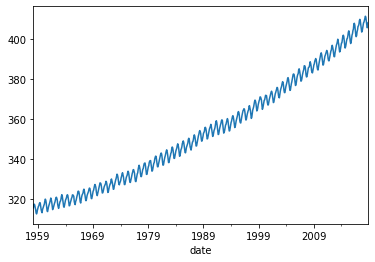

In [56]:
co2.interpolated.plot();

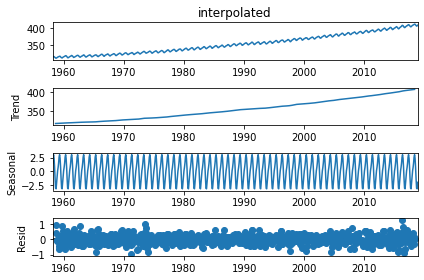

In [57]:
seasonal_decompose(co2.interpolated, model = "additive").plot();

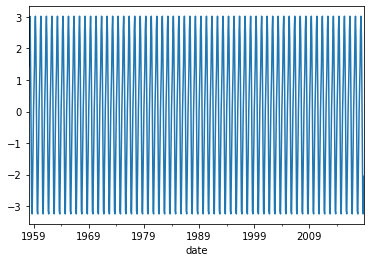

In [58]:
seasonal_decompose(co2.interpolated, model = "additive").seasonal.plot();

In [59]:
auto_arima(co2.interpolated, seasonal = True, m = 12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.253
Date:                            Wed, 17 Nov 2021   AIC                            424.507
Time:                                    11:01:53   BIC                            452.049
Sample:                                         0   HQIC                           435.134
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3545      0.080      4.414      0.000       0.197       0.512
ar.L2          0.0887      0.020      4.345      0.000       0.049       0.129
ma.L1         -0.7088      0.065    -10.885      0.000      -0.836      -0.581
ar.S.L12       0.9996      0.000   2775.636      0.000       0.999       1.000
ma.S.L12      -0.8668      0.021    -40.640      0.000      -0.909      -0.825
sigma2         0.0956      0.005     20.715      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.45
Prob(Q):                              0.78   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
len(co2)

729

In [61]:
train = co2.iloc[:717]
test = co2.iloc[717:]

In [62]:
model = SARIMAX(train["interpolated"], order = (0,1,3), seasonal_order = (1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -201.189
Date:                              Wed, 17 Nov 2021   AIC                            414.378
Time:                                      11:01:55   BIC                            441.820
Sample:                                  03-01-1958   HQIC                           424.975
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3536      0.036     -9.920      0.000      -0.423      -0.284
ma.L2         -0.0240      0.037     -0.649      0.516      -0.096       0.048
ma.L3         -0.0876      0.030     -2.965      0.003      -0.146      -0.030
ar.S.L12       0.9996      0.000   3076.618      0.000       0.999       1.000
ma.S.L12      -0.8669      0.022    -38.555      0.000      -0.911      -0.823
sigma2         0.0950      0.005     20.287      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.36
Prob(Q):                              0.77   Prob(JB):                         0.11
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
start = len(train)
end = len(train) + len(test)-1

In [64]:
predictions = results.predict(start, end, type = "levels").rename("ARIMASeas")
predictions

2017-12-01    406.609703
2018-01-01    407.824572
2018-02-01    408.578577
2018-03-01    409.483498
2018-04-01    411.038772
2018-05-01    411.641645
2018-06-01    410.862541
2018-07-01    409.173199
2018-08-01    407.072991
2018-09-01    405.622605
2018-10-01    405.892276
2018-11-01    407.425204
Freq: MS, Name: ARIMASeas, dtype: float64

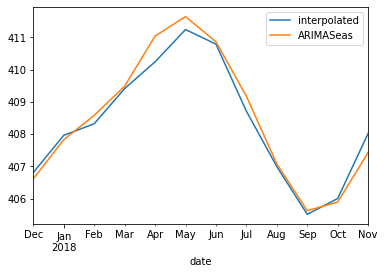

In [65]:
test["interpolated"].plot(legend = True)
predictions.plot(legend = True);

In [66]:
error = rmse(test["interpolated"],predictions)
error

0.3576366587203376

In [67]:
test["interpolated"].mean()

408.3333333333333

### Forecast into the Future

In [68]:
model = SARIMAX(co2["interpolated"], order = (0,1,3) , seasonal_order = (1,0,1,12))
results = model.fit()

In [69]:
forecast = results.predict(start = len(co2), end = len(co2)+11, typ = 'levels').rename("ARIMAFORECAST")

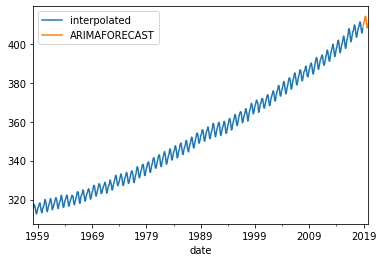

In [70]:
co2["interpolated"].plot(legend = True)
forecast.plot(legend = True);

# Exogenous Regressor Models

* The SARIMAX function also supports exogenous variables (supplemental information which is not historical label information)
* Exogenous variables should all be numerical (one-hot encoding, dummy variables with pandas get_dummies etc)
* Try correlation to see if there might be a relationship

In [71]:
rest = pd.read_csv("datasets/RestaurantVisitors.csv", index_col = "date", parse_dates = True)
rest.shape

(517, 8)

In [72]:
rest.index.freq = "D"

In [73]:
rest.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [74]:
rest.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [75]:
# Drop missing data
rest1 = rest.dropna()
rest1.shape

(478, 8)

In [76]:
rest1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [77]:
# Set the data in the restaurant columns to integer from float
cols = ['rest1', 'rest2', 'rest3','rest4','total']
for col in cols:
    rest1[col] = rest1[col].astype(int)

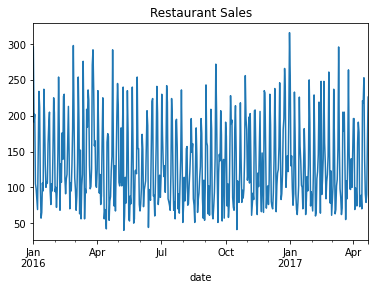

In [78]:
rest1["total"].plot(title = "Restaurant Sales");

### Does the holiday affect the sales?

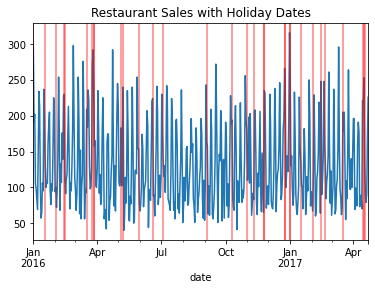

In [79]:
ax = rest1["total"].plot(title = "Restaurant Sales with Holiday Dates")

# Return dates where the entry is a holiday
for day in rest1[rest1["holiday"] ==1].index:
    ax.axvline(x = day, color = "r", alpha = 0.5);
    
#for x in rest1.query('holiday ==1').index (alternative)

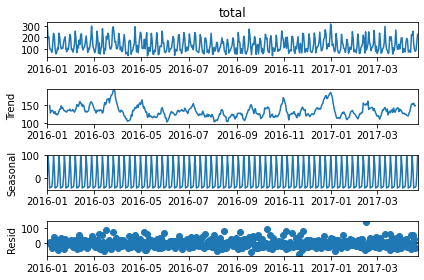

In [80]:
seasonal_decompose(rest1["total"]).plot();

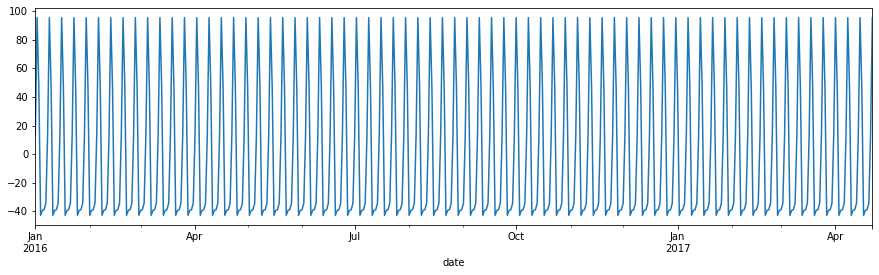

In [81]:
seasonal_decompose(rest1["total"]).seasonal.plot(figsize = (15,4));

In [82]:
len(rest1)

478

## SARIMA (no exogenous variable)

In [83]:
# USE ALL THE DATA TO GET THE ORDERS NOT JUST THE TRAINING DATA
results = auto_arima(rest1["total"], seasonal = True, m = 7).summary()

In [84]:
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2381.245
Date:                   Wed, 17 Nov 2021   AIC                           4770.490
Time:                           11:02:34   BIC                           4787.169
Sample:                                0   HQIC                          4777.048
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.0723      1.600      2.545      0.011       0.936       7.209
ar.S.L7        0.9680      0.012     81.909      0.000       0.945       0.991
ma.S.L7       -0.7313      0.051    -14.451      0.000      -0.830      -0.632
sigma2      1248.4033     75.522     16.530      0.000    1100.384    1396.423
===================================================================================
Ljung-Box (L1) (Q):                  14.32   Jarque-Bera (JB):                59.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.71
Prob(H) (two-sided):                  0.38   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
# Train test split
train = rest1.iloc[:436]
test = rest1.iloc[436:] # month

In [86]:
# Enforce invertability = False (may be removed in future versions)
model = SARIMAX(train["total"], order = (0,0,0), seasonal_order = (1,0,1,7), enforce_invertability = False)

The most recent observations have higher weight than those in the past but where more distant observations have more weight than current, this needs to be adjusted as statsmodels forces theta to be less than one and returns an error. 

In [87]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Wed, 17 Nov 2021   AIC                           4336.738
Time:                           11:02:35   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.58e-05   1.04e+04      0.000       1.000       1.000
ma.S.L7       -0.9383      0.024    -39.198      0.000      -0.985      -0.891
sigma2      1111.8065     58.739     18.928      0.000     996.681    1226.932
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
start = len(train)
end = len(train) + len(test) -1
predictions = results.predict(start = start, end = end).rename("SARIMA MODEL")

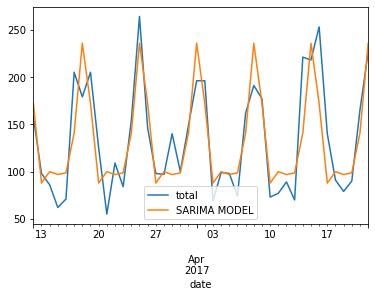

In [89]:
test["total"].plot(legend = True)
predictions.plot(legend = True);

### Add in Holidays

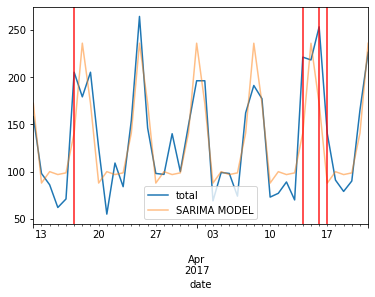

In [90]:
ax = test["total"].plot(legend = True)
predictions.plot(legend = True, alpha = 0.5)
for day in test[test["holiday"] ==1].index:
    ax.axvline(x = day, color = "r", alpha = 0.9);

The peaks where there are holidays are not picked up by the model as they are not included.

In [91]:
error = rmse(predictions,test["total"])

In [92]:
error

31.913930789307035

In [93]:
test["total"].mean()

134.26190476190476

## Add holidays into the dataset

The exogenous needs to be known in the future to do the forecast, you cannot forecast this variable as well.

In [94]:
auto_arima(rest1["total"], exogenous = rest1[["holiday"]], seasonal = True, m = 7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2356.224
Date:                             Wed, 17 Nov 2021   AIC                           4724.448
Time:                                     11:03:01   BIC                           4749.465
Sample:                                 01-01-2016   HQIC                          4734.283
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.9613      3.068      5.202      0.000       9.947      21.975
holiday       45.6339      4.446     10.264      0.000      36.920      54.348
ar.L1          0.1170      0.048      2.415      0.016       0.022       0.212
ar.S.L7        0.8730      0.023     37.832      0.000       0.828       0.918
ma.S.L7       -0.3163      0.056     -5.663      0.000      -0.426      -0.207
sigma2      1118.8311     80.219     13.947      0.000     961.605    1276.057
===================================================================================
Ljung-Box (L1) (Q):                   1.68   Jarque-Bera (JB):                 4.92
Prob(Q):                              0.20   Prob(JB):                         0.09
Heteroskedasticity (H):               0.91   Skew:                             0.22
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
model = SARIMAX(train["total"], exog = train[["holiday"]], order = (1,0,0), seasonal_order = (1,0,1,7),
                enforce_invertability = False)

In [96]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2089.062
Date:                             Wed, 17 Nov 2021   AIC                           4188.124
Time:                                     11:03:01   BIC                           4208.512
Sample:                                 01-01-2016   HQIC                          4196.170
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.5063      3.763     18.203      0.000      61.130      75.883
ar.L1          0.2115      0.044      4.805      0.000       0.125       0.298
ar.S.L7        0.9999   9.02e-05   1.11e+04      0.000       1.000       1.000
ma.S.L7       -0.9460      0.023    -41.601      0.000      -0.991      -0.901
sigma2       783.4332     45.150     17.352      0.000     694.940     871.926
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                20.24
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.23
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

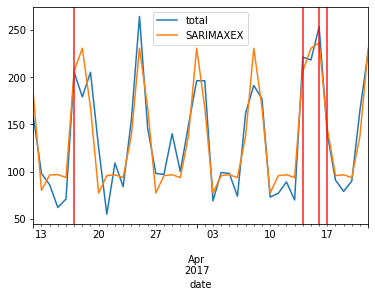

In [97]:
predictions = results.predict(start = start, end = end, exog = test[["holiday"]]).rename("SARIMAXEX")
ax = test["total"].plot(legend = True)
ax = predictions.plot(legend = True)
for day in test[test["holiday"] ==1].index:
    ax.axvline(x = day, color = "r", alpha = 0.9);

In [98]:
error = rmse(predictions,test["total"])
error

23.266844704704294

In [99]:
test["total"].mean()

134.26190476190476

### Forecast

In [100]:
model = SARIMAX(rest1["total"], exog = rest1[["holiday"]], order = (1,0,0), seasonal_order = (1,0,1,7),
                enforce_invertability = False)

In [101]:
results = model.fit()

In [102]:
rest.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [103]:
# Subset from line 478 where we know the holidays but not the sales
exog_forecast = rest[478:][["holiday"]]
exog_forecast.head()

,holiday
date,
2017-04-23,0
2017-04-24,0
2017-04-25,0
2017-04-26,0
2017-04-27,0


In [104]:
forecast = results.predict(len(rest1),len(rest1) + 38, exog = exog_forecast).rename("SARIMAXFORECAST")

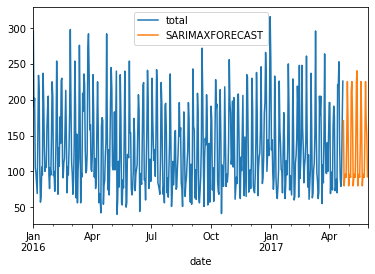

In [105]:
ax = rest1["total"].plot(legend = True)
ax = forecast.plot(legend = True);

# Vector Autoregression

* Previous models the forecast variable was influenced by the outside variable but not in reverse. In some cases variables affect each other.
* Vector autoregression can deal with this. All variables in the model has an equation based of its own lagged variables.
* Each variable is defined with an equation using the other variables each lagged by the number of time periods
* Analyze the time series characteristics
* Test for causation amongst the time series
* Test for stationarity
* Transform the series to make it stationary, if needed
* Find optimal order (p)
* Prepare training and test datasets
* Train the model
* Roll back the transformations, if any.
* Evaluate the model using test set
* Forecast to future

In [107]:
# Load datasets
m = pd.read_csv("datasets/M2SLMoneyStock.csv", index_col = 0, parse_dates = True)
s = pd.read_csv("datasets/PCEPersonalSpending.csv", index_col = 0, parse_dates = True)
m.index.freq = "MS"
s.index.freq = "MS"
print(m.shape, s.shape)

(252, 1) (252, 1)


In [108]:
# Join the datasets
df = m.join(s)

In [109]:
# Check for null values
df.isnull().sum()

Money       0
Spending    0
dtype: int64

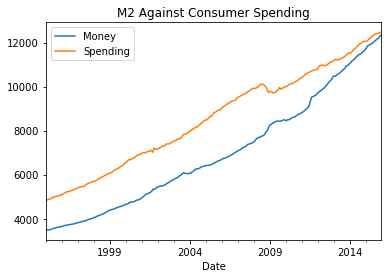

In [110]:
df.plot(title = "M2 Against Consumer Spending");

In [111]:
# Check for stationarity
adf_test(df["Money"])

Fail to reject the Null Hypothesis, the data has a unit root and is non-stationary


ADF Test Statistic          4.239022
P-Value                     1.000000
Number of Lags              4.000000
Number of Observations    247.000000
critical value(1%)         -3.457105
critical value(5%)         -2.873314
critical value(10%)        -2.573044
dtype: float64

In [112]:
adf_test(df["Spending"])

Fail to reject the Null Hypothesis, the data has a unit root and is non-stationary


ADF Test Statistic          0.149796
P-Value                     0.969301
Number of Lags              3.000000
Number of Observations    248.000000
critical value(1%)         -3.456996
critical value(5%)         -2.873266
critical value(10%)        -2.573019
dtype: float64

In [113]:
df_transformed = df.diff()
df_transformed.head()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9


In [114]:
adf_test(df_transformed["Money"].dropna())

Fail to reject the Null Hypothesis, the data has a unit root and is non-stationary


ADF Test Statistic         -2.057404
P-Value                     0.261984
Number of Lags             15.000000
Number of Observations    235.000000
critical value(1%)         -3.458487
critical value(5%)         -2.873919
critical value(10%)        -2.573367
dtype: float64

Remains non-stationary with first order differencing

In [115]:
adf_test(df_transformed["Spending"].dropna())

Reject the Null Hypothesis, the data has no unit root and is stationary


ADF Test Statistic       -7.226974e+00
P-Value                   2.041027e-10
Number of Lags            2.000000e+00
Number of Observations    2.480000e+02
critical value(1%)       -3.456996e+00
critical value(5%)       -2.873266e+00
critical value(10%)      -2.573019e+00
dtype: float64

Even though the second series is stationary, you don't want an uneven number of nan values resulting from the differencing so the stationary series is differenced again along with the non-stationary so there is a second order differencing from both

In [116]:
df_transformed = df_transformed.diff()
df_transformed.head()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,NaN,NaN
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1


In [117]:
df_transformed.tail()

,Money,Spending
Date,,
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8
2015-10-01,-23.1,24.5
2015-11-01,55.8,10.7
2015-12-01,-31.2,-15.0


In [118]:
df_transformed = df_transformed.dropna()

In [119]:
adf_test(df_transformed["Money"])

Reject the Null Hypothesis, the data has no unit root and is stationary


ADF Test Statistic       -7.077471e+00
P-Value                   4.760675e-10
Number of Lags            1.400000e+01
Number of Observations    2.350000e+02
critical value(1%)       -3.458487e+00
critical value(5%)       -2.873919e+00
critical value(10%)      -2.573367e+00
dtype: float64

In [120]:
adf_test(df_transformed["Spending"])

Reject the Null Hypothesis, the data has no unit root and is stationary


ADF Test Statistic       -8.760145e+00
P-Value                   2.687900e-14
Number of Lags            8.000000e+00
Number of Observations    2.410000e+02
critical value(1%)       -3.457779e+00
critical value(5%)       -2.873609e+00
critical value(10%)      -2.573202e+00
dtype: float64

The money column is now stationary as is the spending column

In [121]:
df_transformed.shape

(250, 2)

In [122]:
# Number of observations
obs = 12

In [123]:
train = df_transformed[:-obs]
test = df_transformed[-obs:]
print(train.shape, test.shape)

(238, 2) (12, 2)


In [124]:
test.tail()

,Money,Spending
Date,,
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8
2015-10-01,-23.1,24.5
2015-11-01,55.8,10.7
2015-12-01,-31.2,-15.0


In [125]:
# Choose the order of the auto vector regression model to find p
model = VAR(train)
for p in [1,2,3,4,5,6,7]:
    results = model.fit(p)
    print(f'ORDER:{p}')
    print(f'AIC:{results.aic}')
    print('\n')

ORDER:1
AIC:14.178610495220896


ORDER:2
AIC:13.955189367163705


ORDER:3
AIC:13.849518291541038


ORDER:4
AIC:13.827950574458283


ORDER:5
AIC:13.78730034460964


ORDER:6
AIC:13.799076756885809


ORDER:7
AIC:13.797638727913972




Order 5 looks to have the lowest AIC

In [126]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 17, Nov, 2021
Time:                     11:03:40
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

### Forecasting Values

In [127]:
# Predict the next 12 values (need a numpy array for order 5 and 2 variables (p x k))
# Need to get the five lagged values right before the test set starts
print(train.values.shape)
lagged_values = train.values[-5:]
lagged_values

(238, 2)


array([[-31.9,  40.3],
       [  5.6, -70.7],
       [ 25.5,  52.5],
       [-21.3, -37.2],
       [ 39.5, -17.8]])

In [128]:
# Forecast from the end of the training set onwards for 12 periods
forecasted_values = results.forecast(y = lagged_values, steps = 12)
forecasted_values

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [129]:
# Dataframe of forecasted values covering 12 points into the test set (same period)
idx = pd.date_range('2015-01-01', periods = 12, freq = 'MS')
f = pd.DataFrame(forecasted_values, index = idx, columns = ['Money_2d','Spending_2d'])
f

,Money_2d,Spending_2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


### Invert the transformations

In [130]:
# Need to account for the differencing to compare with the test set. Need to reverse the first and second differences

# 
f["Money_1d"] = (df["Money"].iloc[-obs-1] - df['Money'].iloc[-obs-2]) + f['Money_2d'].cumsum()
f['MoneyForecast'] = df['Money'].iloc[-obs-1] + f["Money_1d"].cumsum()

# 
f["Spending_1d"] = (df["Spending"].iloc[-obs-1] - df["Spending"].iloc[-obs-2]) + f["Spending_2d"].cumsum()
f["SpendingForecast"] = df["Spending"].iloc[-obs-1] + f["Spending_1d"].cumsum()


In [131]:
f.head()

,Money_2d,Spending_2d,Money_1d,MoneyForecast,Spending_1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549


In [132]:
test_range = df[-obs:]
test_range

,Money,Spending
Date,,
2015-01-01,11733.2,12046.0
2015-02-01,11852.4,12082.4
2015-03-01,11868.8,12158.3
2015-04-01,11916.1,12193.8
2015-05-01,11947.6,12268.1
2015-06-01,11993.1,12308.3
2015-07-01,12045.3,12355.4
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8


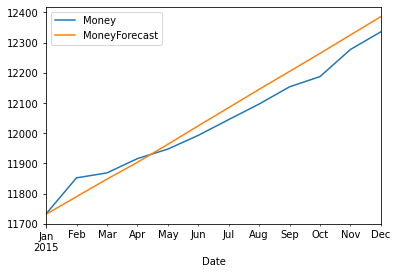

In [133]:
test_range["Money"].plot(legend = True)
f["MoneyForecast"].plot(legend = True);

In [134]:
print(rmse(test_range["Money"], f["MoneyForecast"]))
print(test_range["Money"].mean())

43.71049653558938
12034.008333333333


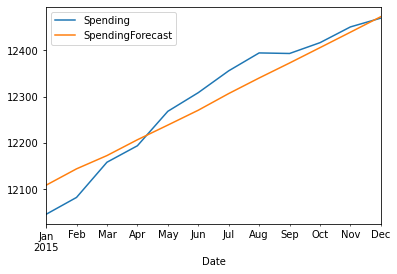

In [135]:
test_range["Spending"].plot(legend = True)
f["SpendingForecast"].plot(legend = True);

In [136]:
print(rmse(test_range["Spending"], f["SpendingForecast"]))
print(test_range["Spending"].mean())

37.00117516940808
12294.533333333335


# VARMA Model

* Includes the Moving Average term
* Auto arima can be used here

In [138]:
auto_arima(df["Money"], max_iter = 1000)

ARIMA(order=(1, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [139]:
auto_arima(df["Spending"], max_iter = 1000)

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

The differencing identified in the previous section is shown. p = 1, q = 2

In [140]:
df_transformed = df.diff().diff().dropna()

In [141]:
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [142]:
train = df_transformed[0:-obs]
test = df_transformed[-obs:]

In [143]:
print(train.shape, test.shape)

(238, 2) (12, 2)


In [144]:
model = VARMAX(train, order = (1,2),trend = 'c')
results = model.fit(max_iter = 1000, disp = False)
results.summary()

Dep. Variable:,"['Money', 'Spending']",No. Observations:,238
Model:,"VARMA(1,2)",Log Likelihood,-2291.836
,+ intercept,AIC,4617.673
Date:,"Wed, 17 Nov 2021",BIC,4676.701
Time:,11:04:07,HQIC,4641.462
Sample:,03-01-1995,,
,- 12-01-2014,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.15, 0.43",Jarque-Bera (JB):,"616.09, 132.30"
Prob(Q):,"0.70, 0.51",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"6.21, 2.57",Skew:,"1.36, -0.29"


In [145]:
df_forecast = results.forecast(12)
df_forecast.head()

,Money,Spending
2015-01-01,-18.202858,37.910435
2015-02-01,-11.135062,-8.472577
2015-03-01,4.227009,3.501615
2015-04-01,-1.519957,-0.744181
2015-05-01,0.680398,0.715146


In [146]:
# Invert the transformation
df_forecast["Money_1d"] = (df["Money"].iloc[-obs-1] - df['Money'].iloc[-obs-2]) + df_forecast['Money'].cumsum()
df_forecast['MoneyForecast'] = df['Money'].iloc[-obs-1] + df_forecast["Money_1d"].cumsum()
 
df_forecast["Spending_1d"] = (df["Spending"].iloc[-obs-1] - df["Spending"].iloc[-obs-2]) + df_forecast["Spending"].cumsum()
df_forecast["SpendingForecast"] = df["Spending"].iloc[-obs-1] + df_forecast["Spending_1d"].cumsum()

In [147]:
df_forecast.head()

,Money,Spending,Money_1d,MoneyForecast,Spending_1d,SpendingForecast
2015-01-01,-18.202858,37.910435,60.397142,11730.497142,48.510435,12110.510435
2015-02-01,-11.135062,-8.472577,49.262080,11779.759223,40.037858,12150.548294
2015-03-01,4.227009,3.501615,53.489089,11833.248311,43.539473,12194.087766
2015-04-01,-1.519957,-0.744181,51.969132,11885.217443,42.795292,12236.883059
2015-05-01,0.680398,0.715146,52.649529,11937.866973,43.510439,12280.393497


In [148]:
final = pd.concat([df.iloc[-12:], df_forecast[["MoneyForecast","SpendingForecast"]]], axis = 1)
final.head()

,Money,Spending,MoneyForecast,SpendingForecast
2015-01-01,11733.2,12046.0,11730.497142,12110.510435
2015-02-01,11852.4,12082.4,11779.759223,12150.548294
2015-03-01,11868.8,12158.3,11833.248311,12194.087766
2015-04-01,11916.1,12193.8,11885.217443,12236.883059
2015-05-01,11947.6,12268.1,11937.866973,12280.393497


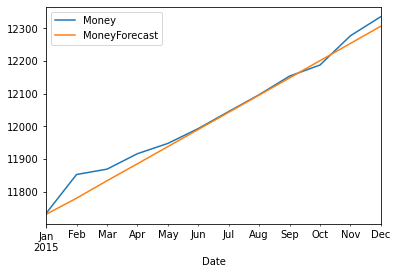

In [149]:
df["Money"][-obs:].plot(legend = True).autoscale(axis = 'x', tight = True)
final["MoneyForecast"].plot(legend = True);

In [150]:
rmse(df["Money"][-obs:],final["MoneyForecast"])

27.718214481849213

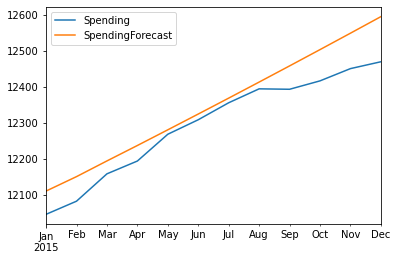

In [151]:
final["Spending"].plot(legend = True).autoscale(axis = 'x', tight = True)
final["SpendingForecast"].plot(legend = True);

In [152]:
rmse(df["Spending"][-obs:],final["SpendingForecast"])

64.47656963625602